In [69]:
import yfinance as yf
import pylab as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [114]:
ticker = pd.read_csv('Dataset_all_indicators.csv')
ticker['close_to_open'] = ticker['Close'] - ticker['Open']
ticker['return'] = ticker['Close']/ticker['Open']
missing_values_count = 0
missing_values_count += ticker.isnull().sum()
print(missing_values_count)
print(ticker.head())

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
MA 50            0
EMA 50           0
MA 200           0
EMA 200          0
RSI 14           0
STOCH K          0
STOCH D          0
MACD VALUE       0
SIG LINE         0
MACD HIST        0
BB UP            0
BB MID           0
BB DOWN          0
ADX              0
PRICE_CHANGE     1
close_to_open    0
return           0
dtype: int64
         Date      Open      High       Low     Close    Volume     MA 50  \
0  1986-12-24  0.108284  0.108284  0.107738  0.108011   7027200  0.096329   
1  1986-12-26  0.108011  0.108831  0.107738  0.107738   3715200  0.096953   
2  1986-12-29  0.107738  0.108831  0.103363  0.103363  41702400  0.097489   
3  1986-12-30  0.103363  0.105003  0.102268  0.104456  25401600  0.098003   
4  1986-12-31  0.104457  0.107191  0.104457  0.105550  23356800  0.098528   

     EMA 50    MA 200   EMA 200  ...  MACD VALUE  SIG LINE  MACD HIST  \
0  0.096265  0

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn_pandas import DataFrameMapper


x = ticker

#mapper = DataFrameMapper([(y.columns, LabelEncoder())])
#scaled_features = mapper.fit_transform(y.copy())
#y = pd.DataFrame(scaled_features, index=y.index, columns=y.columns)

#rint(y.value_counts())
x.set_index('Date', inplace=True)

mapper = DataFrameMapper([(x.columns.drop('PRICE_CHANGE','Date'), StandardScaler()),
                          (['PRICE_CHANGE'], LabelEncoder())])
scaled_features = mapper.fit_transform(x.copy())
x = pd.DataFrame(scaled_features, index=x.index, columns=x.columns)

C:\Users\ciara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(8904, 10)


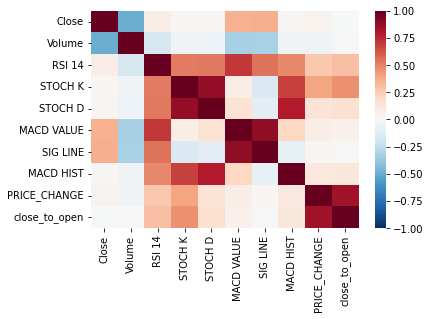

In [117]:
del_feats = ['High','Low','Open','MA 50','EMA 50','MA 200','EMA 200','BB UP','BB MID','BB DOWN']
for feat in del_feats:
   x = x.drop(feat,axis=1) 

### Find the spearmans rank correlation between all features
corr = x.corr(method ="spearman")

### A limit of 0.5 removes those that possess no strong correlation with any other data
spearmans_limit = 0.4

### Removes columns besides PRICE CHANGE from dataset if they do not have a correlation with any other datapoint (removes itself from comparison)

df_training_trimmed = x.drop([i for i,row in corr.iterrows() if (max(abs(row.drop(i,axis=0)))<spearmans_limit)],axis=1)
corr_ected = df_training_trimmed.corr(method='spearman')
#df_testing_x  = df_testing_x.drop([a for a in set(df_testing_x.columns) if a not in set(df_training_trimmed.columns)],axis=1)
x = x.drop([a for a in set(x.columns) if a not in set(df_training_trimmed.columns)],axis=1)

### Plot, print new column sizes
print(x.shape)

plot = sns.heatmap(corr_ected,cmap="RdBu_r", vmin=-1, vmax=1)
fig = plot.get_figure()
#fig.savefig('correlation2.png')

In [120]:
# Principal Component Analysis
sk_model = PCA(n_components=9)
sk_model.fit_transform(x)
print(pd.DataFrame(sk_model.components_,columns=x.columns))
print(sk_model.explained_variance_ratio_.cumsum())

      Close    Volume    RSI 14   STOCH K   STOCH D  MACD VALUE  SIG LINE  \
0  0.182812 -0.150985  0.455666  0.439950  0.426146    0.348607  0.241664   
1  0.381774 -0.226952 -0.013877 -0.336569 -0.290925    0.466807  0.549400   
2  0.041786 -0.000534 -0.037022 -0.094678 -0.325193   -0.030281  0.075174   
3 -0.417088  0.762263  0.144651 -0.132346 -0.101542    0.314680  0.259672   
4 -0.033532  0.167222  0.278566  0.215516  0.152735   -0.125803  0.170393   
5  0.714306  0.545837 -0.353175  0.171395  0.158650   -0.051207 -0.047614   
6 -0.122966 -0.007226  0.091208  0.068096  0.236576   -0.044017  0.097472   
7  0.344408  0.136616  0.746084 -0.309416 -0.226625   -0.239343 -0.281839   
8 -0.004913  0.005774  0.050882  0.700348 -0.679614    0.010498 -0.003327   

   MACD HIST  PRICE_CHANGE  close_to_open  
0   0.303698      0.178408       0.238757  
1  -0.160616     -0.139058      -0.199370  
2  -0.267985      0.653156       0.614143  
3   0.169810      0.029315      -0.009758  
4  -0.756